# Web Structure Mining con Python
Ejecución de un estudio básico de estructura de enlaces sobre un sitio web. Sitio a analizar: **https://www.artificial-intelligence.blog/ai-news**

### Preparamos el entorno

Instalaremos estas librerías necesarias:

In [1]:
pip install requests beautifulsoup4 networkx matplotlib scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# 2. Configuración inicial
start_url = "https://www.artificial-intelligence.blog/ai-news"
domain = "www.artificial-intelligence.blog"
max_depth = 2

queue = deque([(start_url, 0)])
visited = set()
edges = []

### Implementamos un crawler sencillo 

Recorrer el sitio usando Breath first search

In [ ]:
def extract_links(url):
    try:
        r = requests.get(url, timeout=5)
        soup = BeautifulSoup(r.text, "html.parser")
    except:
        return []

    links = []
    for a in soup.find_all("a", href=True):
        href = a['href']
        absolute = urljoin(url, href)
        if urlparse(absolute).netloc == domain:
            links.append(absolute)
    return links

# Crawler BFS
while queue:
    url, depth = queue.popleft()
    
    if depth > max_depth:
        continue
    if url in visited:
        continue
    
    visited.add(url)
    links = extract_links(url)
    
    for link in links:
        edges.append((url, link))
        if link not in visited:
            queue.append((link, depth + 1))

print(f"Total páginas visitadas: {len(visited)}")
print(f"Total enlaces encontrados: {len(edges)}")

C:\Users\Bruno\AppData\Local\Temp\ipykernel_5600\370593324.py:4: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(r.text, "html.parser")


### Construcción del grafo y cálculo de métricas estructurales con la librería NetworkX

In [ ]:
# Grafo
G = nx.DiGraph()
G.add_edges_from(edges)
len(G.nodes()), len(G.edges())

(1435, 21980)

In [ ]:
# Métricas estructurales
pagerank = nx.pagerank(G)
hubs, authorities = nx.hits(G)
in_deg = dict(G.in_degree())
out_deg = dict(G.out_degree())

sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_pagerank

[('https://www.artificial-intelligence.blog/cart', 0.012464958153548915),
 ('https://www.artificial-intelligence.blog/', 0.012464958153548915),
 ('https://www.artificial-intelligence.blog/ai-merch', 0.012464958153548915),
 ('https://www.artificial-intelligence.blog/ai-news', 0.01235968468754035),
 ('https://www.artificial-intelligence.blog/ai-news/category/news',
  0.01235968468754035),
 ('https://www.artificial-intelligence.blog/ai-news/category/technology',
  0.01235968468754035),
 ('https://www.artificial-intelligence.blog/ai-news/category/business',
  0.01235968468754035),
 ('https://www.artificial-intelligence.blog/ai-news/category/education',
  0.01235968468754035),
 ('https://www.artificial-intelligence.blog/ai-news/category/ethics',
  0.01235968468754035),
 ('https://www.artificial-intelligence.blog/ai-news/category/art',
  0.01235968468754035)]

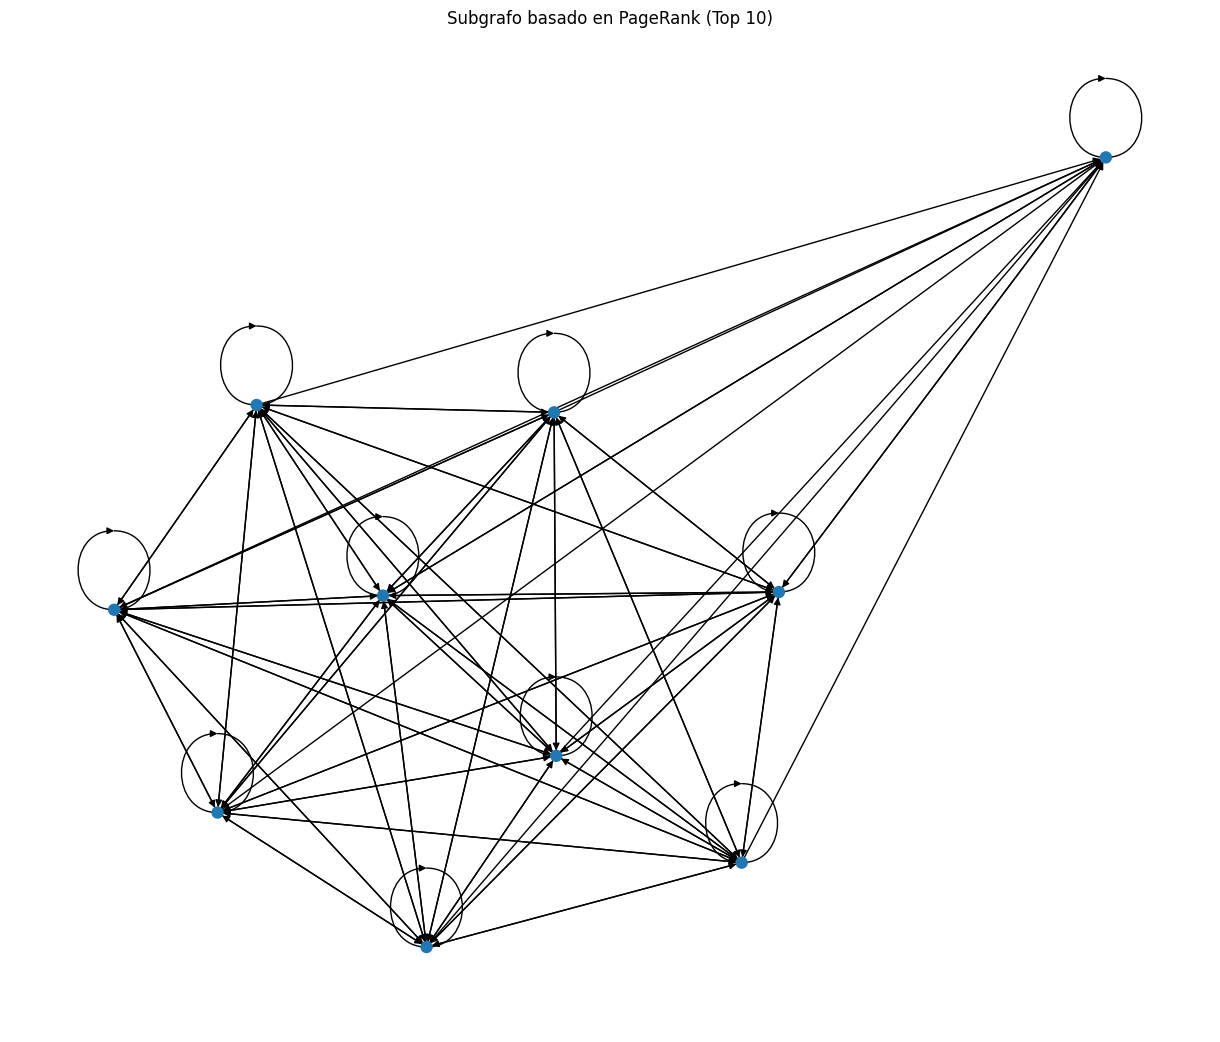

In [ ]:
# Visualización del subgrafo principal
top_nodes = [n for n, _ in sorted_pagerank]
H = G.subgraph(top_nodes)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(H, seed=42)
sizes = [pagerank[n] * 5000 for n in H.nodes()]

nx.draw(H, pos, with_labels=False, node_size=sizes)
plt.title("Subgrafo basado en PageRank (Top 10)")
plt.show()